# Cisco - Ariel University API Security Detection Challenge 2023
## Baseline code


### Imports and global settings

In [103]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 2 # Options are [1, 2, 3, 4]
test_type = 'label' # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly 
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.Attack_Tag,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...,"Fri, 11 Nov 2022 03:12:09 GMT",GET,http://127.0.0.1:5000/static/download_txt/7115,,404 NOT FOUND,application/json,32,404,"{""error"": ""File not found""}",NaN,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...,"Fri, 11 Nov 2022 03:01:18 GMT",GET,http://127.0.0.1:5000/about/random_page,,200 OK,text/html; charset=utf-8,1163,200,"<figure><img src=""https://img-c.udemycdn.com/r...",NaN,NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...,"Fri, 11 Nov 2022 03:01:17 GMT",GET,http://127.0.0.1:5000/categories/check/all,,200 OK,application/json,1112,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",NaN,NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...,"Fri, 11 Nov 2022 02:40:48 GMT",GET,http://127.0.0.1:5000/states/5911,,404 NOT FOUND,application/json,33,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...,"Fri, 11 Nov 2022 03:05:42 GMT",GET,http://127.0.0.1:5000/orders/get/ship_via/10642,,404 NOT FOUND,application/json,36,404,"{""error"": ""Ship VIA not found""}",NaN,NaN,NaN,NaN,NaN


In [104]:
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.Attack_Tag,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...,"Fri, 11 Nov 2022 03:12:09 GMT",GET,http://127.0.0.1:5000/static/download_txt/7115,,404 NOT FOUND,application/json,32,404,"{""error"": ""File not found""}",NaN,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...,"Fri, 11 Nov 2022 03:01:18 GMT",GET,http://127.0.0.1:5000/about/random_page,,200 OK,text/html; charset=utf-8,1163,200,"<figure><img src=""https://img-c.udemycdn.com/r...",NaN,NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...,"Fri, 11 Nov 2022 03:01:17 GMT",GET,http://127.0.0.1:5000/categories/check/all,,200 OK,application/json,1112,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",NaN,NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...,"Fri, 11 Nov 2022 02:40:48 GMT",GET,http://127.0.0.1:5000/states/5911,,404 NOT FOUND,application/json,33,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...,"Fri, 11 Nov 2022 03:05:42 GMT",GET,http://127.0.0.1:5000/orders/get/ship_via/10642,,404 NOT FOUND,application/json,36,404,"{""error"": ""Ship VIA not found""}",NaN,NaN,NaN,NaN,NaN


<AxesSubplot: ylabel='Frequency'>

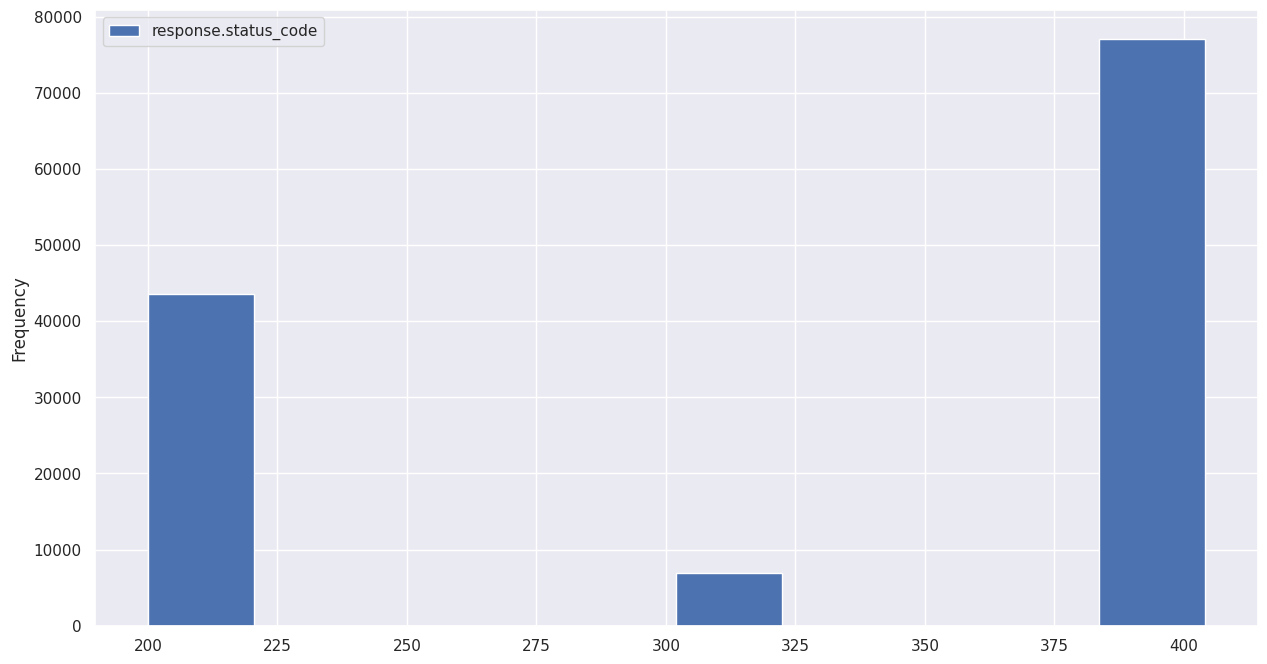

In [105]:
df.plot.hist(x='response.status')


<AxesSubplot: ylabel='Frequency'>

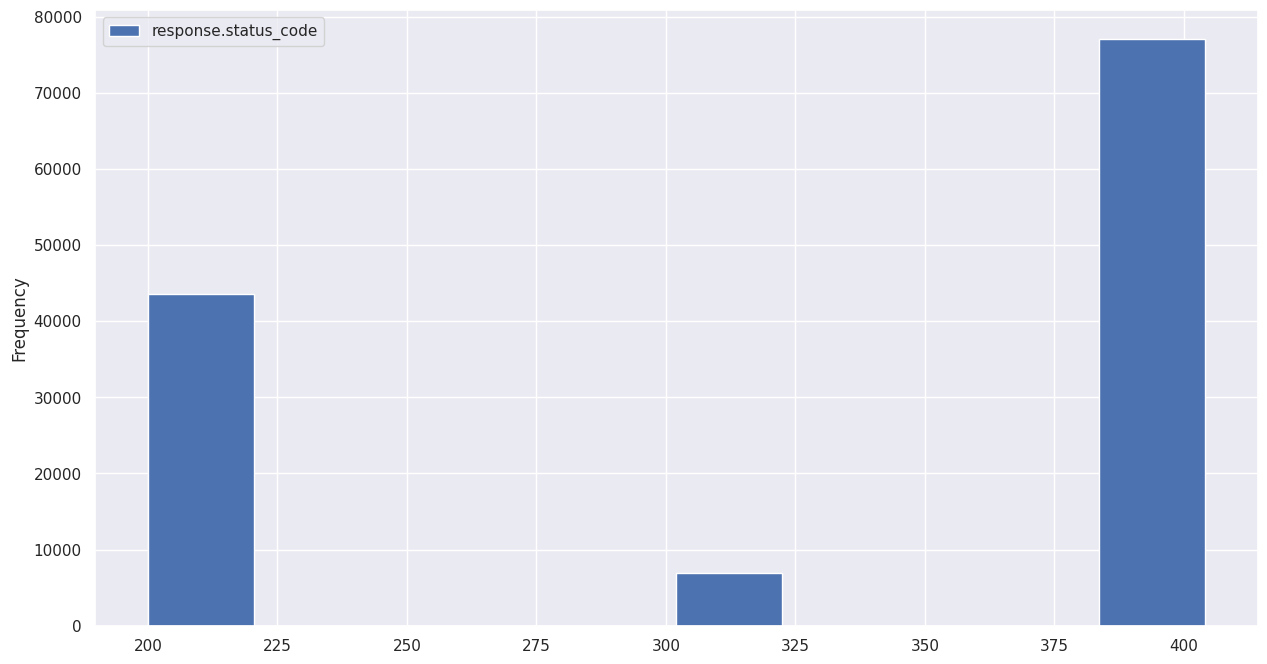

In [106]:
df.plot.hist(x='response.headers.Content-Type')

<AxesSubplot: xlabel='response.headers.Content-Type', ylabel='count'>

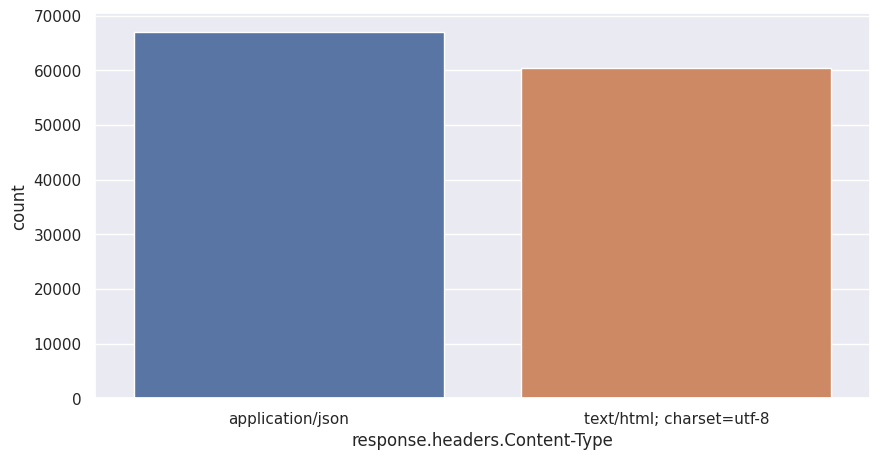

In [107]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='response.headers.Content-Type', data=df)


<AxesSubplot: xlabel='response.status', ylabel='Count'>

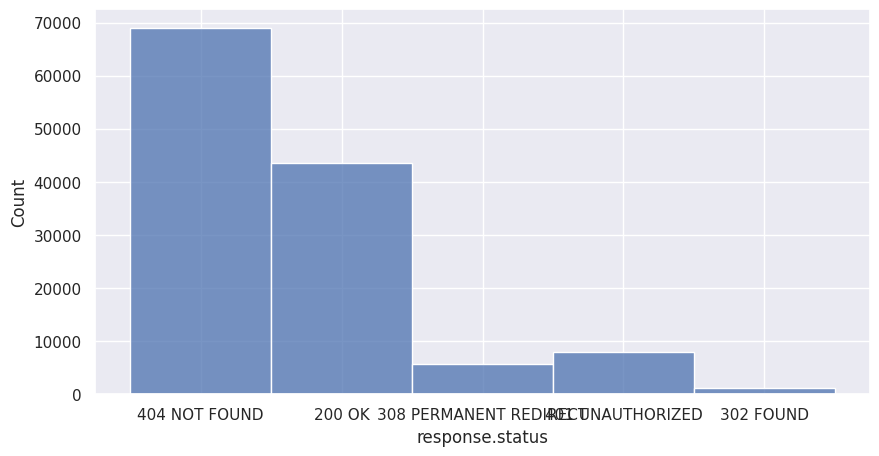

In [108]:
sns.histplot(x='response.status', data=df)

In [109]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...,"Fri, 11 Nov 2022 03:12:09 GMT",GET,http://127.0.0.1:5000/static/download_txt/7115,,404 NOT FOUND,application/json,32,404,"{""error"": ""File not found""}",NaN,NaN,NaN,NaN,Benign,Benign
1,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...,"Fri, 11 Nov 2022 03:01:18 GMT",GET,http://127.0.0.1:5000/about/random_page,,200 OK,text/html; charset=utf-8,1163,200,"<figure><img src=""https://img-c.udemycdn.com/r...",NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...,"Fri, 11 Nov 2022 03:01:17 GMT",GET,http://127.0.0.1:5000/categories/check/all,,200 OK,application/json,1112,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",NaN,NaN,NaN,NaN,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...,"Fri, 11 Nov 2022 02:40:48 GMT",GET,http://127.0.0.1:5000/states/5911,,404 NOT FOUND,application/json,33,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...,"Fri, 11 Nov 2022 03:05:42 GMT",GET,http://127.0.0.1:5000/orders/get/ship_via/10642,,404 NOT FOUND,application/json,36,404,"{""error"": ""Ship VIA not found""}",NaN,NaN,NaN,NaN,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127495,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=ubWnuAa4wIHnDTz0Su8AYWJAM7fUMCps6AxyNzFok...,"Fri, 11 Nov 2022 02:57:49 GMT",GET,http://127.0.0.1:5000/orders/get/employee_id/5482,,404 NOT FOUND,application/json,39,404,"{""error"": ""Employee ID not found""}",NaN,NaN,NaN,NaN,Benign,Benign
127496,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=SkLWkaUE83sP38c3kf-XYBCKlSlSmBTQSEJw6EaMg...,"Fri, 11 Nov 2022 02:56:21 GMT",GET,http://127.0.0.1:5000/post/new/,,200 OK,text/html; charset=utf-8,70,200,<form method='POST'><input name='message'><inp...,NaN,NaN,NaN,NaN,Benign,Benign
127497,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=giYaDJkC2Oa-rCmlAvYglQzy_Em-YHTv_5aOjposX...,"Fri, 11 Nov 2022 02:49:37 GMT",GET,http://127.0.0.1:5000/post/new/,,200 OK,text/html; charset=utf-8,70,200,<form method='POST'><input name='message'><inp...,NaN,NaN,NaN,NaN,Benign,Benign
127498,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=VzOU9Ac91LxJ8UAvQ8Wt3c5Ua-30j4s9kcdTKrwCw...,"Fri,

In [110]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')
    
# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...,"Fri, 11 Nov 2022 03:12:09 GMT",GET,http://127.0.0.1:5000/static/download_txt/7115,,404 NOT FOUND,application/json,32,404,"{""error"": ""File not found""}",None,None,None,None,Benign,Benign
1,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...,"Fri, 11 Nov 2022 03:01:18 GMT",GET,http://127.0.0.1:5000/about/random_page,,200 OK,text/html; charset=utf-8,1163,200,"<figure><img src=""https://img-c.udemycdn.com/r...",None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...,"Fri, 11 Nov 2022 03:01:17 GMT",GET,http://127.0.0.1:5000/categories/check/all,,200 OK,application/json,1112,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",None,None,None,None,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...,"Fri, 11 Nov 2022 02:40:48 GMT",GET,http://127.0.0.1:5000/states/5911,,404 NOT FOUND,application/json,33,404,"{""error"": ""State not found""}",None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...,"Fri, 11 Nov 2022 03:05:42 GMT",GET,http://127.0.0.1:5000/orders/get/ship_via/10642,,404 NOT FOUND,application/json,36,404,"{""error"": ""Ship VIA not found""}",None,None,None,None,Benign,Benign


In [111]:
features_list = df.columns.to_list()
print(features_list)

['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept', 'request.headers.Connection', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-User', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.headers.Date', 'request.method', 'request.url', 'request.body', 'response.status', 'response.headers.Content-Type', 'response.headers.Content-Length', 'response.status_code', 'response.body', 'response.headers.Location', 'request.headers.Cookie', 'request.headers.Content-Length', 'response.headers.Set-Cookie', 'attack_type', 'label']


In [112]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif


# Select only the feature columns
features_list.remove('attack_type')
features_list.remove('label')

X1 = df[features_list]

# Preprocess the data to convert non-numeric values to numeric representations
X1 = X1.apply(LabelEncoder().fit_transform)  # Encode categorical features as numeric labels
X1 = SimpleImputer(strategy='mean').fit_transform(X1)  # Impute missing values with the mean

# Extract the target variable
y = df['label']

# Compute mutual information between features and target variable
mi = mutual_info_classif(X1, y)

# Print the mutual information values
print(mi)

# Select the top k features based on mutual information
k = 10
top_k_features = np.argsort(mi)[::-1][:k]
print(top_k_features)


[1.12229850e-03 3.46808380e-04 5.08139199e-03 3.10355296e-04
 1.79924796e-04 6.55348314e-03 3.96576822e-03 8.47624125e-03
 3.40505449e-04 4.74339232e-03 1.14293974e-02 1.66524661e-01
 2.50730825e-02 2.10562260e-01 0.00000000e+00 6.50472471e-02
 6.50800039e-03 1.50723085e-01 6.53969405e-02 1.65507746e-01
 5.14942964e-02 5.13223784e-02 5.24644335e-02 2.71900633e-02]
[13 11 19 17 18 15 22 20 21 23]


In [113]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Use the LabelEncoder to encode the 'request.headers.Cookie' and 'response.headers.Set-Cookie' columns
df['request.headers.Cookie_encoded'] = label_encoder.fit_transform(df['request.headers.Cookie'])
df['response.headers.Set-Cookie_encoded'] = label_encoder.fit_transform(df['response.headers.Set-Cookie'])

# Scale the encoded 'request.headers.Cookie' and 'response.headers.Set-Cookie' features using MinMaxScaler
scaler = MinMaxScaler()
df['request.headers.Cookie_scaled'] = scaler.fit_transform(df['request.headers.Cookie_encoded'].values.reshape(-1,1))
df['response.headers.Set-Cookie_scaled'] = scaler.fit_transform(df['response.headers.Set-Cookie_encoded'].values.reshape(-1,1))

# Combine the scaled 'request.headers.Cookie' and 'response.headers.Set-Cookie' features by concatenating them
df['cookie_set-cookie'] = df['request.headers.Cookie_scaled'] + df['response.headers.Set-Cookie_scaled']


In [114]:
# Import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the 'response.headers.Content-Length' and 'response.status_code' features
df['response.headers.Content-Length_scaled'] = scaler.fit_transform(df['response.headers.Content-Length'].values.reshape(-1,1))
df['response.status_code_scaled'] = scaler.fit_transform(df['response.status_code'].values.reshape(-1,1))

# Combine the scaled 'response.headers.Content-Length' and 'response.status_code' features by adding them together
df['content_length_status_code'] = df['response.headers.Content-Length_scaled'] + df['response.status_code_scaled']


In [115]:
# Scale the 'request.url' and 'request.method' features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Encode the 'request.url' and 'request.method' features using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['request.url_encoded'] = le.fit_transform(df['request.url'])
df['request.method_encoded'] = le.fit_transform(df['request.method'])

# Scale the encoded 'request.url' and 'request.method' features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['request.url_scaled'] = scaler.fit_transform(df['request.url_encoded'].values.reshape(-1,1))
df['request.method_scaled'] = scaler.fit_transform(df['request.method_encoded'].values.reshape(-1,1))

# Combine the scaled 'request.url' and 'request.method' features by concatenating them
df['request_type'] = df['request.url_scaled'] + df['request.method_scaled']





In [116]:
# Import necessary preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
# Create a SimpleImputer object to impute missing values using the mean


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

features = ['request.url', 'response.body', 'response.headers.Content-Length', 'response.status', 
      'response.status_code', 'request.headers.Cookie', 'response.headers.Location']


# Import necessary preprocessing tools
from sklearn.impute import IterativeImputer

# Create an IterativeImputer object to impute missing values
imputer = IterativeImputer(random_state=0)

# Select only the numeric columns from the DataFrame
X = df[features].select_dtypes(include=[np.number])

# Use the SimpleImputer to impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode categorical features
encoder = LabelEncoder()
X[:,0] = encoder.fit_transform(X[:,0])





In [117]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif


# Select only the feature columns
#features_list.remove('attack_type')
#features_list.remove('label')

#X = df[features_list]

# Preprocess the data to convert non-numeric values to numeric representations
#X = X.apply(LabelEncoder().fit_transform)  # Encode categorical features as numeric labels
#X = SimpleImputer(strategy='mean').fit_transform(X)  # Impute missing values with the mean

# Extract the target variable
y = df['label']

# Compute mutual information between features and target variable
#mi = mutual_info_classif(X, y)

# Print the mutual information values
#print(mi)

## Select the top k features based on mutual information
#k = 10
#top_k_features = np.argsort(mi)[::-1][:k]
#print(top_k_features)


### Basic dataset label arrangements

In [118]:
top_k_feature_names = []
for feature_index in top_k_features:
    feature_name = features_list[feature_index]
    top_k_feature_names.append(feature_name)

print(top_k_feature_names)

['request.url', 'request.headers.Date', 'response.body', 'response.headers.Content-Length', 'response.status_code', 'response.status', 'request.headers.Content-Length', 'response.headers.Location', 'request.headers.Cookie', 'response.headers.Set-Cookie']


In [119]:
# Create an empty list to store the columns that are not in the top_k_feature_names list
non_top_k_columns = []

# Iterate over the columns in the dataframe
for column in df.columns:
    # If the column is not in the top_k_feature_names list, add it to the non_top_k_columns list
    if column not in top_k_feature_names:
        non_top_k_columns.append(column)

# Print the non_top_k_columns list
print(non_top_k_columns)



['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept', 'request.headers.Connection', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-User', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.body', 'response.headers.Content-Type', 'attack_type', 'label', 'request.headers.Cookie_encoded', 'response.headers.Set-Cookie_encoded', 'request.headers.Cookie_scaled', 'response.headers.Set-Cookie_scaled', 'cookie_set-cookie', 'response.headers.Content-Length_scaled', 'response.status_code_scaled', 'content_length_status_code', 'request.url_encoded', 'request.method_encoded', 'request.url_scaled', 'request.method_scaled', 'request_type']


In [120]:
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label,request.headers.Cookie_encoded,response.headers.Set-Cookie_encoded,request.headers.Cookie_scaled,response.headers.Set-Cookie_scaled,cookie_set-cookie,response.headers.Content-Length_scaled,response.status_code_scaled,content_length_status_code,request.url_encoded,request.method_encoded,request.url_scaled,request.method_scaled,request_type
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...,"Fri, 11 Nov 2022 03:12:09 GMT",GET,http://127.0.0.1:5000/static/download_txt/7115,,404 NOT FOUND,application/json,32,404,"{""error"": ""File not found""}",None,None,None,None,Benign,Benign,0,0,0.0,0.0,0.0,0.000033,1.0,1.000033,66111,0,0.980832,0.0,0.980832
1,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,same-origin,?1,document,['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...,"Fri, 11 Nov 2022 03:01:18 GMT",GET,http://127.0.0.1:5000/about/random_page,,200 OK,text/html; charset=utf-8,1163,200,"<figure><img src=""https://img-c.udemycdn.com/r...",None,None,None,None,Benign,Benign,0,0,0.0,0.0,0.0,0.003180,0.0,0.003180,2,0,0.000030,0.0,0.000030
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,websocket,?1,document,['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...,"Fri, 11 Nov 2022 03:01:17 GMT",GET,http://127.0.0.1:5000/categories/check/all,,200 OK,application/json,1112,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",None,None,None,None,Benign,Benign,0,0,0.0,0.0,0.0,0.003038,0.0,0.003038,3,0,0.000045,0.0,0.000045
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...,"Fri, 11 Nov 2022 02:40:48 GMT",GET,http://127.0.0.1:5000/states/5911,,404 NOT FOUND,application/json,33,404,"{""error"": ""State not found""}",None,None,None,None,Benign,Benign,0,0,0.0,0.0,0.0,0.000036,1.0,1.000036,56924,0,0.844532,0.0,0.844532
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...,"Fri, 11 Nov 2022 03:05:42 GMT",GET,http://127.0.0.1:5000/orders/get/ship_via/10642,,404 NOT FOUND,application/json,36,404,"{""error"": ""Ship VIA not found""}",None,None,None,None,Benign,Benign,0,0,0.0,0.0,0.0,0.000045,1.0,1.000045,50325,0,0.746628,0.0,0.746628


In [121]:
#mark this whole code as a comment: # Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['request.url', 'response.body', 'response.headers.Content-Length', 'response.status', 
'response.status_code', 'request.headers.Cookie', 'response.headers.Location'
                ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.method', 'request.headers.Content-Length', 'response.headers.Set-Cookie', 
                    ]

COLUMNS_TO_REMOVE = ['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding',
 'request.headers.Accept', 'request.headers.Connection', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 
     'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-User', 'request.headers.Sec-Fetch-Dest', 
'request.headers.Set-Cookie', 'request.body', 'response.headers.Content-Type','request.headers.Date']

# This is our main preprocessing function that will iterate over all of the chosen 
# columns and run some feature extraction models
def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        df[column] = le.fit_transform(df[column])
    
    # Replace np.nan values with an empty string before running HashingVectorizer
    df = df.fillna('')
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        df.drop(column, axis=1, inplace=True)
    return df


df = vectorize_df(df)
df.head()

,request.method,request.url,response.status,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label,request.headers.Cookie_encoded,response.headers.Set-Cookie_encoded,request.headers.Cookie_scaled,response.headers.Set-Cookie_scaled,cookie_set-cookie,response.headers.Content-Length_scaled,response.status_code_scaled,content_length_status_code,request.url_encoded,request.method_encoded,request.url_scaled,request.method_scaled,request_type
0,0.0,66111,4,38,4,4763,1,0,-1.0,-1.0,Benign,Benign,0,0,0.0,0.0,0.0,0.000033,1.0,1.000033,66111,0,0.980832,0.0,0.980832
1,0.0,2,0,11,0,8,1,0,-1.0,-1.0,Benign,Benign,0,0,0.0,0.0,0.0,0.003180,0.0,0.003180,2,0,0.000030,0.0,0.000030
2,0.0,3,0,9,0,4415,1,0,-1.0,-1.0,Benign,Benign,0,0,0.0,0.0,0.0,0.003038,0.0,0.003038,3,0,0.000045,0.0,0.000045
3,0.0,56924,4,39,4,4768,1,0,-1.0,-1.0,Benign,Benign,0,0,0.0,0.0,0.0,0.000036,1.0,1.000036,56924,0,0.844532,0.0,0.844532
4,0.0,50325,4,44,4,4767,1,0,-1.0,-1.0,Benign,Benign,0,0,0.0,0.0,0.0,0.000045,1.0,1.000045,50325,0,0.746628,0.0,0.746628


In [122]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127500 entries, 0 to 127499
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   request.method                          127500 non-null  float64
 1   request.url                             127500 non-null  int64  
 2   response.status                         127500 non-null  int64  
 3   response.headers.Content-Length         127500 non-null  int64  
 4   response.status_code                    127500 non-null  int64  
 5   response.body                           127500 non-null  int64  
 6   response.headers.Location               127500 non-null  int64  
 7   request.headers.Cookie                  127500 non-null  int64  
 8   request.headers.Content-Length          127500 non-null  float64
 9   response.headers.Set-Cookie             127500 non-null  float64
 10  attack_type                             1275

In [123]:
top_k_feature_names = [features_list[i] for i in top_k_features]
print(top_k_feature_names)


['request.url', 'request.headers.Date', 'response.body', 'response.headers.Content-Length', 'response.status_code', 'response.status', 'request.headers.Content-Length', 'response.headers.Location', 'request.headers.Cookie', 'response.headers.Set-Cookie']


In [124]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.
#top_k_features= list(top_k_features)
#features_list = df.columns.to_list()
#print(top_k_features)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

request.method                            float64
request.url                                 int64
response.status                             int64
response.headers.Content-Length             int64
response.status_code                        int64
response.body                               int64
response.headers.Location                   int64
request.headers.Cookie                      int64
request.headers.Content-Length            float64
response.headers.Set-Cookie               float64
attack_type                                object
label                                      object
request.headers.Cookie_encoded              int64
response.headers.Set-Cookie_encoded         int64
request.headers.Cookie_scaled             float64
response.headers.Set-Cookie_scaled        float64
cookie_set-cookie                         float64
response.headers.Content-Length_scaled    float64
response.status_code_scaled               float64
content_length_status_code                float64


In [125]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.
top_k_features= list(top_k_features)
#features_list = df.columns.to_list()
print(top_k_features)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

[13, 11, 19, 17, 18, 15, 22, 20, 21, 23]


request.method                            float64
request.url                                 int64
response.status                             int64
response.headers.Content-Length             int64
response.status_code                        int64
response.body                               int64
response.headers.Location                   int64
request.headers.Cookie                      int64
request.headers.Content-Length            float64
response.headers.Set-Cookie               float64
attack_type                                object
label                                      object
request.headers.Cookie_encoded              int64
response.headers.Set-Cookie_encoded         int64
request.headers.Cookie_scaled             float64
response.headers.Set-Cookie_scaled        float64
cookie_set-cookie                         float64
response.headers.Content-Length_scaled    float64
response.status_code_scaled               float64
content_length_status_code                float64


In [126]:
top_k_feature_names = [col for col in top_k_feature_names if col in df.columns]
X1 = df[top_k_feature_names]


# Preprocess the data to convert non-numeric values to numeric representations
X1 = X1.apply(LabelEncoder().fit_transform)  # Encode categorical features as numeric labels
X1= SimpleImputer(strategy='mean').fit_transform(X)  # Impute missing values with the mean

## Train test split

In [127]:
from sklearn.preprocessing import LabelEncoder

# Convert the string labels to numeric labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)





## Model choosing and fitting

In [128]:
from sklearn.preprocessing import LabelEncoder

# Convert the string labels to numeric labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Import RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with 100 trees
clf = RandomForestClassifier(n_estimators=100)



# Fit the model to the training data
clf.fit(X_train, y_train)

# Print the shapes of the resulting datasets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)




(102000, 1) (102000,)
(25500, 1) (25500,)


## Result printout

              precision    recall  f1-score   support

           0    0.93370   1.00000   0.96571     23590
           1    1.00000   0.12304   0.21911      1910

    accuracy                        0.93431     25500
   macro avg    0.96685   0.56152   0.59241     25500
weighted avg    0.93867   0.93431   0.90979     25500



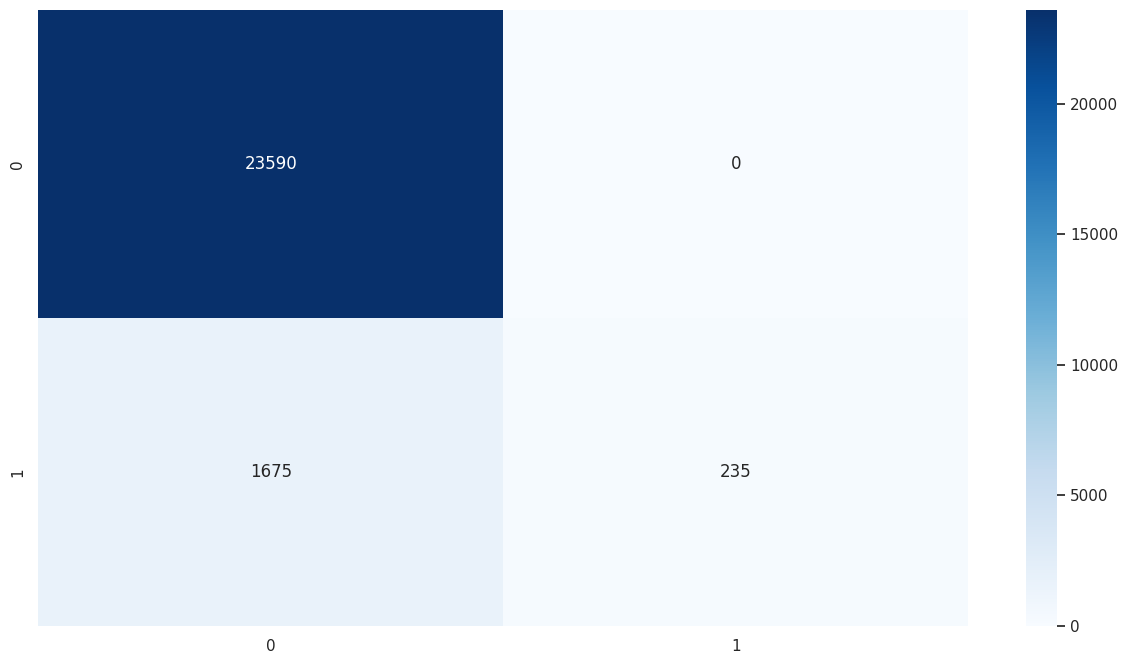

In [129]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
predictions = clf.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
clf_report = classification_report(true_labels, predictions, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
print(clf_report)

In [130]:
df['label']

0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
           ...  
127495    Benign
127496    Benign
127497    Benign
127498    Benign
127499    Benign
Name: label, Length: 127500, dtype: object

In [131]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.method', 'request.url', 'response.status', 'response.headers.Content-Length', 'response.status_code', 'response.body', 'response.headers.Location', 'request.headers.Cookie', 'request.headers.Content-Length', 'response.headers.Set-Cookie', 'request.headers.Cookie_encoded', 'response.headers.Set-Cookie_encoded', 'request.headers.Cookie_scaled', 'response.headers.Set-Cookie_scaled', 'cookie_set-cookie', 'response.headers.Content-Length_scaled', 'response.status_code_scaled', 'content_length_status_code', 'request.url_encoded', 'request.method_encoded', 'request.url_scaled', 'request.method_scaled', 'request_type']


request.method                            float64
request.url                                 int64
response.status                             int64
response.headers.Content-Length             int64
response.status_code                        int64
response.body                               int64
response.headers.Location                   int64
request.headers.Cookie                      int64
request.headers.Content-Length            float64
response.headers.Set-Cookie               float64
attack_type                                object
label                                      object
request.headers.Cookie_encoded              int64
response.headers.Set-Cookie_encoded         int64
request.headers.Cookie_scaled             float64
response.headers.Set-Cookie_scaled        float64
cookie_set-cookie                         float64
response.headers.Content-Length_scaled    float64
response.status_code_scaled               float64
content_length_status_code                float64


In [132]:
# delete it from complex columns and add it to remove_columns for data set 1 : , 'request.headers.Date'

# Test

In [133]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model 
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
    test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
    test_df = vectorize_df(test_df)

# Predict with your model

    X = test_df[features].to_numpy()
    predictions = clf.predict(X)

ValueError: X has 9 features, but RandomForestClassifier is expecting 1 features as input.

# Save your predictions

In [ ]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')